# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# Setting environment to ignore future warnings
import warnings
warnings.simplefilter('ignore')

# Loading Data

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/risenW/Practical_feature_engineering_guide/master/sendy_logistics.csv")
pd.set_option('max_columns', 30)
df.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,10:27:30 AM,9,5,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,11:40:22 AM,12,5,11:44:09 AM,12,5,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,12:49:34 PM,30,2,12:53:03 PM,30,2,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,9:26:05 AM,15,5,9:37:56 AM,15,5,9:43:06 AM,15,5,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,9:56:18 AM,13,1,10:03:53 AM,13,1,10:05:23 AM,13,1,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [ ]:
df.shape

(21201, 29)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Order No                                   21201 non-null  object 
 1   User Id                                    21201 non-null  object 
 2   Vehicle Type                               21201 non-null  object 
 3   Platform Type                              21201 non-null  int64  
 4   Personal or Business                       21201 non-null  object 
 5   Placement - Day of Month                   21201 non-null  int64  
 6   Placement - Weekday (Mo = 1)               21201 non-null  int64  
 7   Placement - Time                           21201 non-null  object 
 8   Confirmation - Day of Month                21201 non-null  int64  
 9   Confirmation - Weekday (Mo = 1)            21201 non-null  int64  
 10  Confirmation - Time   

In [ ]:
df.describe(include="all")

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
count,21201,21201,21201,21201.000000,21201,21201.000000,21201.000000,21201,21201.000000,21201.000000,21201,21201.000000,21201.000000,21201,21201.000000,21201.000000,21201,21201.000000,21201.000000,21201,21201.000000,16835.000000,552.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201,21201.000000
unique,21201,3186,1,NaN,2,NaN,NaN,15686,NaN,NaN,15742,NaN,NaN,15767,NaN,NaN,15690,NaN,NaN,15725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,924,NaN
top,Order_No_6135,User_Id_393,Bike,NaN,Business,NaN,NaN,9:41:03 AM,NaN,NaN,9:56:52 AM,NaN,NaN,2:32:04 PM,NaN,NaN,10:53:20 AM,NaN,NaN,3:24:03 PM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rider_Id_726,NaN
freq,1,645,21201,NaN,17384,NaN,NaN,6,NaN,NaN,6,NaN,NaN,6,NaN,NaN,6,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,247,NaN
mean,NaN,NaN,NaN,2.752182,NaN,15.653696,3.240083,NaN,15.653837,3.240225,NaN,15.653837,3.240225,NaN,15.653837,3.240225,NaN,15.653837,3.240225,NaN,9.506533,23.258889,7.905797,-1.281470,36.811264,-1.282581,36.811220,NaN,1556.920947
std,NaN,NaN,NaN,0.625178,NaN,8.798916,1.567295,NaN,8.798886,1.567228,NaN,8.798886,1.567228,NaN,8.798886,1.567228,NaN,8.798886,1.567228,NaN,5.668963,3.615768,17.089971,0.030507,0.037473,0.034824,0.044721,NaN,987.270788
min,NaN,NaN,NaN,1.000000,NaN,1.000000,1.000000,NaN,1.000000,1.000000,NaN,1.000000,1.000000,NaN,1.000000,1.000000,NaN,1.000000,1.000000,NaN,1.000000,11.200000,0.100000,-1.438302,36.653621,-1.430298,36.606594,NaN,1.000000
25%,NaN,NaN,NaN,3.000000,NaN,8.000000,2.000000,NaN,8.000000,2.000000,NaN,8.000000,2.000000,NaN,8.000000,2.000000,NaN,8.000000,2.000000,NaN,5.000000,20.600000,1.075000,-1.300921,36.784605,-1.301201,36.785661,NaN,882.000000
50%,NaN,NaN,NaN,3.000000,NaN,15.000000,3.000000,NaN,15.000000,3.000000,NaN,15.000000,3.000000,NaN,15.000000,3.000000,NaN,15.000000,3.000000,NaN,8.000000,23.500000,2.900000,-1.279395,36.807040,-1.284382,36.808002,NaN,1369.000000
75%,NaN,NaN,NaN,3.000000,NaN,23.000000,5.000000,NaN,23.000000,5.000000,NaN,23.000000,5.000000,NaN,23.000000,5.000000,NaN,23.000000,5.000000,NaN,13.000000,26.000000,4.900000,-1.257147,36.829741,-1.261177,36.829477,NaN,2040.000000


In [ ]:
data = df.copy()
data.dropna(inplace=True)

data["Arrival at Destination - Time"] = pd.to_timedelta(data["Arrival at Destination - Time"])
data["Pickup - Time"] = pd.to_timedelta(data["Pickup - Time"])

data["time"] = data["Arrival at Destination - Time"] - data["Pickup - Time"]
data["second"] = data.time.apply(lambda x:int(str(x)[-5:][:2]))*60

In [ ]:
data = data[["Temperature", "Platform Type", "Confirmation - Day of Month", "Placement - Day of Month", "Placement - Weekday (Mo = 1)", "second"]]

In [ ]:
# creating base model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(data.drop("second", axis=1), data.second)

RandomForestRegressor()

In [ ]:
model.score(data.drop("second", axis=1), data.second)

0.4322838593496994

# Feature Engineering

### Handling Categorical Features

In [ ]:
# Encoding categorical features
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

cols = ["Vehicle Type", "Personal or Business"]
for i in cols:
    df[i] = encoder.fit_transform(df[i])

### Handling Missing Values

In [ ]:
# Filling NAN values in temperature field
df["Temperature"].fillna(value=df.Temperature.mean(), inplace=True)

In [ ]:
# Dropping empty feature and Primary Keys
df.drop(["Precipitation in millimeters", "Order No", "User Id", "Rider Id"], axis=1, inplace=True)

### Handling Outliers

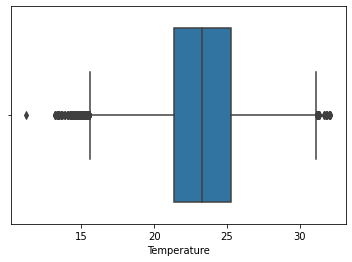

In [ ]:
sns.boxplot(df.Temperature)
plt.show()

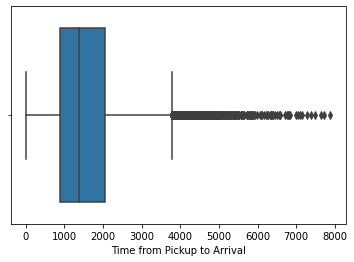

In [ ]:
sns.boxplot(df["Time from Pickup to Arrival"])
plt.show()

In [ ]:
cols = ["Temperature", "Time from Pickup to Arrival"]

df_n = df.copy()

# lets try to remove the outliers
for x in df[cols].columns.tolist():
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df_n.loc[df[x] < min,x] = np.nan
    df_n.loc[df[x] > max,x] = np.nan

# lets try to check the sum of count of NULL values/outliers in each column of the dataset
print(df_n.isnull().sum())
df = df_n.dropna(axis = 0)

Vehicle Type                                   0
Platform Type                                  0
Personal or Business                           0
Placement - Day of Month                       0
Placement - Weekday (Mo = 1)                   0
Placement - Time                               0
Confirmation - Day of Month                    0
Confirmation - Weekday (Mo = 1)                0
Confirmation - Time                            0
Arrival at Pickup - Day of Month               0
Arrival at Pickup - Weekday (Mo = 1)           0
Arrival at Pickup - Time                       0
Pickup - Day of Month                          0
Pickup - Weekday (Mo = 1)                      0
Pickup - Time                                  0
Arrival at Destination - Day of Month          0
Arrival at Destination - Weekday (Mo = 1)      0
Arrival at Destination - Time                  0
Distance (KM)                                  0
Temperature                                  362
Pickup Lat          

In [ ]:
# Resetting index
df.reset_index(drop=True, inplace=True)

### Feature Construction

In [ ]:
!pip install mpu
import mpu

     |████████████████████████████████| 69 kB 3.1 MB/s 


In [ ]:
# Calculating distance
distance = []
for i in range(len(df)):
    cord1 = (df["Pickup Lat"][i], df["Pickup Long"][i])
    cord2 = (df["Destination Lat"][i], df["Destination Long"][i])
    dist = mpu.haversine_distance(cord1, cord2)*1000
    distance.append(dist)

df["distance"] = distance

In [ ]:
# Calculating time
df["Arrival at Destination - Time"] = pd.to_timedelta(df["Arrival at Destination - Time"])
df["Pickup - Time"] = pd.to_timedelta(df["Pickup - Time"])

df["time"] = df["Arrival at Destination - Time"] - df["Pickup - Time"]
df["second"] = df.time.apply(lambda x:int(str(x)[-5:][:2]))*60

In [ ]:
# Calculatin Speed
df["speed"] = df["distance"]/df["second"]

In [ ]:
# Dropping time feature
df.drop(["Placement - Time", "Confirmation - Time", "Pickup - Time", "time", "Arrival at Pickup - Time", "Arrival at Destination - Time"], axis=1, inplace=True)

In [ ]:
df.drop(df[df.speed == float("inf")].index, axis=0, inplace=True)

### Feature Scaling

In [ ]:
X = df.drop("Time from Pickup to Arrival", axis=1)
y = df["Time from Pickup to Arrival"]

In [ ]:
# Scaling data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X = scaler.fit_transform(X)

### Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(chi2,k=15)
selector.fit(X, y)

SelectKBest(k=15, score_func=<function chi2 at 0x7f2400acf950>)

In [ ]:
X = selector.transform(X)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
X = pca.fit_transform(X, y)

In [ ]:
X

array([[-4.07256865e-01,  7.03667187e-01, -2.21243995e-01, ...,
        -1.39463354e-05,  3.76345429e-16,  1.29276155e-30],
       [-1.89384127e-01,  7.35235037e-01,  7.69829695e-01, ...,
         5.74449156e-06,  8.04095704e-17, -1.76596690e-31],
       [ 9.96985155e-01, -6.08873346e-01, -1.38356751e-01, ...,
        -7.12672137e-06, -7.03433593e-17, -1.25121206e-31],
       ...,
       [-6.25929018e-02,  1.03311741e+00, -2.41961240e-01, ...,
         4.18876215e-06,  6.78166885e-18,  4.44947306e-33],
       [-6.06931918e-01,  3.55967419e-01, -2.11845334e-01, ...,
        -3.21311996e-05, -1.77097602e-17,  5.09352922e-33],
       [ 6.99416976e-01, -5.68552648e-01, -1.49422278e-01, ...,
        -4.92877481e-05, -8.66319766e-19, -1.40513255e-32]])

In [ ]:
model = RandomForestRegressor()
model.fit(X, y)

RandomForestRegressor()

In [ ]:
model.score(X, y)

0.9932444091736254

## <font color='#2F4F4F'>Summary of Findings</font>

What are your findings?

Feature selection is an important step while working with a machine learning project. New features were created. There were 29 features and after completing the feature engineering there were fewer features.

And with respect to modeling before and after the faturing, there was a noticeable improvement in the performances of models. Before feature engineering the model's score was around 44% but after feature its score was around 99%.

## <font color='#2F4F4F'>Challenging your Solution</font>

#### a) Did we have the right question?

Yes

#### b) Did we have the right data?

Yes

